In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Importing relevant Testing Data and NN model Weights

In [2]:
def import_data(import_path):
    savedMod = load_model(str(import_path) + "nn_model.h5")
    X_test = np.load(str(import_path) + "X_test.npy")
    y_test = np.load(str(import_path) + "y_test.npy")
    return savedMod, X_test, y_test

In [3]:
def nn_statistics(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred = tf.argmax(y_pred, axis=1)

    #Normalized confusion matris
    conf_matrix = confusion_matrix(y_test, y_pred, normalize='true')
    return(conf_matrix, accuracy_score(y_test, y_pred))

In [4]:
import numpy as np
# "Words" contains the subset of words we make predictions for. 
threewordsubset =  np.array(['hvad', 'ja', 'soed'])
words =  np.array(['hvad', 'ja', 'soed', 'mange', 'nej', 'nu', 'fordi', 'koebe', 'tid'])
label_map = {label:num for num, label in enumerate(words)}

# Base path leading to directory containing folders with videos for all signs defined in "words" array
base_path = "../extended_subset"

# Path for saving processed Data Arrays
proc_data_path = "../export_data/"

In [5]:
model, X_test, y_test = import_data(proc_data_path)


Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2023-05-31 11:48:03.949006: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-05-31 11:48:03.949039: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [6]:
confusion, accuracy = nn_statistics(model, X_test, y_test)
accuracy

2023-05-31 11:48:05.482730: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-05-31 11:48:05.555637: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 3s 924ms/step


ValueError: Classification metrics can't handle a mix of multilabel-indicator and multiclass targets

In [34]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

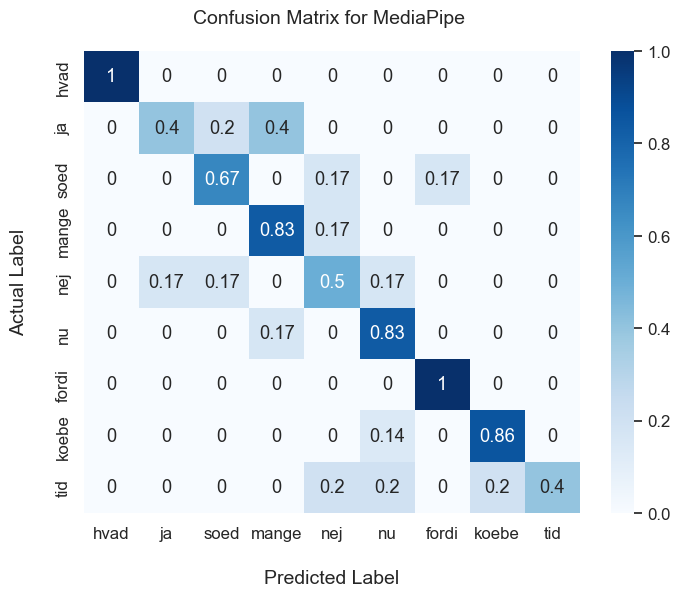

In [35]:
import seaborn as sns

# Change figure size and increase dpi for better resolution
plt.figure(figsize=(8,6), dpi=100)
# Scale up the size of all text
sns.set(font_scale = 1.1)

# Plot Confusion Matrix using Seaborn heatmap()
# Parameters:
# first param - confusion matrix in array format   
# annot = True: show the numbers in each heatmap cell
# fmt = 'd': show numbers as integers. 
ax = sns.heatmap(confusion, annot=True,  cmap='Blues')

# set x-axis label and ticks. 
ax.set_xlabel("Predicted Label", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(words)

# set y-axis label and ticks
ax.set_ylabel("Actual Label", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(words)

# set plot title
ax.set_title("Confusion Matrix for MediaPipe ", fontsize=14, pad=20)
plt.savefig('confusion_matrix_MediaPipe.png', dpi=300, bbox_inches='tight')